### RESAMPLING TECHNIQUES 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
pd.set_option("display.max_columns" , 50)

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\kaggle\train.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0.18,0.31,0,1,0,0,1,0,0
1,5,2,16,0,0,0,0,0,0,0,0,1,0,0,0.31,0.40,0,0,0,0,1,0,0
2,7,4,4,0,0,0,0,0,0,0,0,0,0,0,0.73,0.78,0,0,0,0,1,0,0
3,9,0,9,0,1,1,1,0,0,0,0,0,0,0,0.86,0.69,0,0,0,0,1,0,0
4,10,300,8,0,0,0,0,0,40,100,122,7,0,0,0.00,0.00,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58914,84165,11,8,0,0,0,0,2,6,17,26,6,0,0,0.54,0.64,0,1,0,0,1,0,0
58915,84166,0,8,0,4,5,7,2,3,4,5,0,0,0,0.76,0.77,0,0,0,0,1,0,1
58916,84167,0,2,0,1,1,1,0,0,0,0,0,0,0,0.09,0.06,0,0,0,0,1,0,1
58917,84169,6,4,0,0,0,0,0,0,0,0,0,0,0,0.77,0.80,0,1,0,0,1,0,0


In [3]:
df['went_on_backorder'].value_counts()

0    49624
1     9295
Name: went_on_backorder, dtype: int64

Text(0, 0.5, 'Frequency')

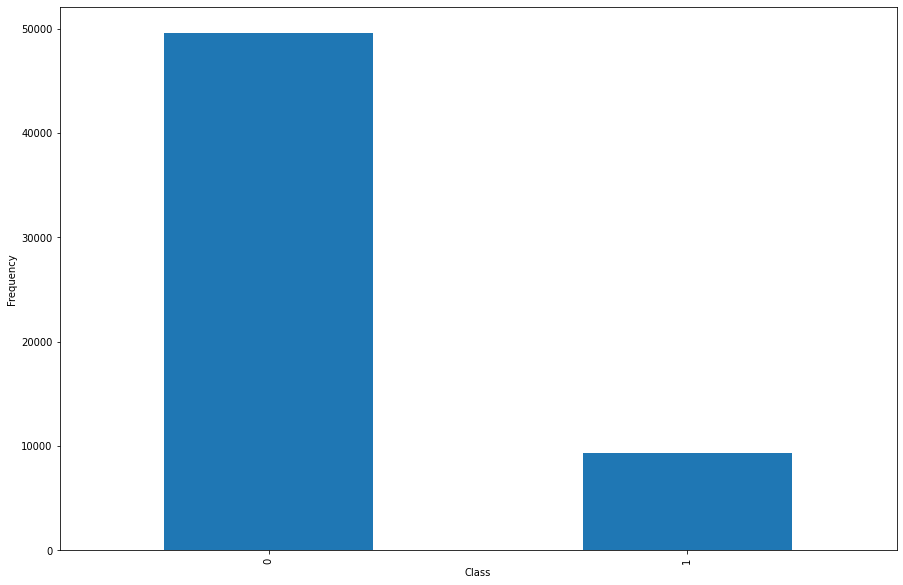

In [4]:
plt.figure(figsize=(15,10))
df['went_on_backorder'].value_counts().plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Scale the data 

In [5]:
from sklearn.preprocessing import MinMaxScaler

### Separate the Data

In [6]:
X = df.drop(["went_on_backorder" , "sku"] ,1 )
y = df["went_on_backorder"]

In [7]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)


In [8]:
X_sc

array([[0.00531398, 0.07142857, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00528774, 0.57142857, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00531398, 0.14285714, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.0052615 , 0.07142857, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00534023, 0.14285714, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0052615 , 0.42857143, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58914    0
58915    1
58916    1
58917    0
58918    0
Name: went_on_backorder, Length: 58919, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.30, random_state = 62)

I will attempt to perform 3 methods of sampling to resolve this imbalanced dataset issue

##### Undersampling

##### Oversampling

##### SMOTE - Synthetic Minority Oversampling Technique


## 1. Undersampling

#### The process of reducing the class instances of the MAJORITY class is called Undersampling. I will attempt to undersample the data and give a 50/50 ratio to each of the class's instances. Following are the steps for undersampling

    * Find the number of the minority class

    * Find the indices of the majority class

    * Find the indices of the minority class

    * Randomly sample the majority indices with respect to the minority numbers

    * Concat the minority indices with the indices from step 4

    * Get the balanced dataframe - This is the final undersampled data

#### Disadvantage is you will lose critical data as you are reducing the instances of the majority class.



## 1 - Backorder (Minority Class)
## 0 - Not Backorder (Majority Class)

In [11]:
#1. Find the number of the minority class

number_bo = len(df[df['went_on_backorder']==1])

In [12]:
number_not_bo = len(df[df['went_on_backorder']==0])

In [13]:
print(number_bo)
print(number_not_bo)

9295
49624


In [14]:
#2. Find the indices of the majority class
index_not_bo= df[df['went_on_backorder']==0].index

In [15]:
#.3 Find the indices of the minority class
index_bo = df[df['went_on_backorder']==1].index

In [16]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_not_bo, number_bo,replace='False')

In [17]:
len(random_indices)

9295

In [18]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_bo,random_indices])

In [19]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = df.iloc[under_sample_indices]

In [20]:
under_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
11,26,79,2,0,225,405,675,49,155,244,311,63,0,0,0.69,0.69,0,1,0,0,1,0,1
13,32,7,8,0,48,96,144,6,28,41,45,0,0,0,0.51,0.47,0,0,0,1,1,0,1
22,45,3,2,1,8,12,20,6,15,20,32,2,0,0,0.98,0.96,0,0,0,0,1,0,1
37,66,0,8,0,22,31,47,4,15,15,19,3,0,0,0.64,0.63,0,0,0,0,1,0,1
40,69,-2,8,48,408,744,996,136,386,636,1036,304,0,36,0.86,0.88,41,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21199,30307,23,2,0,20,40,64,13,31,63,90,0,0,0,0.83,0.69,0,0,0,0,1,0,0
12710,18167,7,2,0,0,0,0,5,8,8,8,0,0,0,0.53,0.54,0,1,0,0,1,0,0
21237,30353,92,8,12,49,114,172,18,79,154,231,35,0,0,0.73,0.72,0,0,0,0,1,0,0
22264,31822,87,2,0,200,200,200,20,43,95,181,47,0,0,0.60,0.68,0,0,0,0,1,0,0


In [21]:
Counter(under_sample_df["went_on_backorder"])

Counter({1: 9295, 0: 9295})

In [22]:
under_sample_backorder_counts = pd.value_counts(under_sample_df['went_on_backorder'])

<AxesSubplot:>

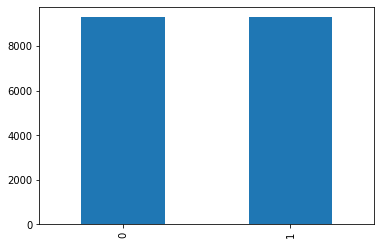

In [23]:
under_sample_backorder_counts.plot(kind = "bar")

In [24]:
## now that our data is equally distributed, we can split the data to X,y, train and test

In [25]:
X_under = under_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_under = under_sample_df["went_on_backorder"]

In [26]:
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.30, random_state=100)

## Random Forest 

In [27]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [28]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_under_train, y_under_train)

RandomForestClassifier()

#### Random Forest Prediction

In [29]:
# Predicted probabilities
y_pred = rf.predict_proba(x_under_test)

In [30]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [31]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [32]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_under_test)

In [33]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [34]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [35]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [36]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [37]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [38]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [39]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,35276,0,0.000000
1,39499,1,0.626667
2,16097,0,0.000000
3,16135,1,0.550000
4,8801,1,0.800000


In [40]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [41]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,35276,0,0.000000,0
1,39499,1,0.626667,1
2,16097,0,0.000000,0
3,16135,1,0.550000,1
4,8801,1,0.800000,1
...,...,...,...,...
5572,29547,0,0.230000,0
5573,13037,0,0.020000,0
5574,31071,1,0.950000,1
5575,38221,0,0.220000,0


In [42]:
from sklearn import metrics 

In [43]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[2436,  287],
       [ 243, 2611]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

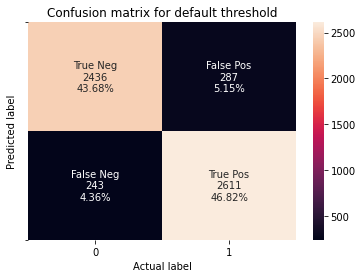

In [44]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [45]:
Accuracy = metrics.accuracy_score(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Accuracy)

0.9049668280437512


In [46]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2723
           1       0.90      0.91      0.91      2854

    accuracy                           0.90      5577
   macro avg       0.91      0.90      0.90      5577
weighted avg       0.91      0.90      0.90      5577



### ROC Plot

In [47]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [48]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

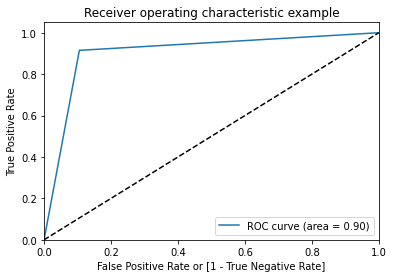

(array([0.        , 0.10539846, 1.        ]),
 array([0.        , 0.91485634, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [49]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [50]:
from sklearn.metrics import recall_score , precision_score , f1_score

In [51]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 90.47289421963131
The Recall score is :  91.48563419761739
The Precision score is :  90.09661835748793
The f1 score is :  90.78581363004172


In [52]:
print(confusion)

[[2436  287]
 [ 243 2611]]


Text(33.0, 0.5, 'Predicted label')

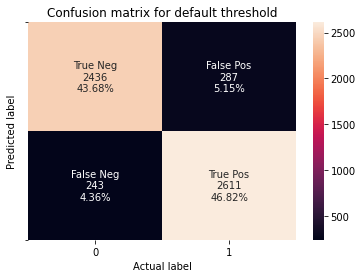

In [53]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

## Comparison

##### ROC_AUC

In [54]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_under_train)

print("The Training roc_auc score for Under Sampling is :", roc_auc_score(y_under_train,pred_train)*100)
print("The Testing roc_auc score for Under Sampling is :", roc_auc_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training roc_auc score for Under Sampling is : 99.79303572300964
The Testing roc_auc score for Under Sampling is : 90.47289421963131


##### PRECISION

In [55]:
print("The Training Precision score for Under Sampling is :", precision_score(y_under_train,pred_train)*100)
print("The Testing Precision score for Under Sampling is :", precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Precision score for Under Sampling is : 99.7363523573201
The Testing Precision score for Under Sampling is : 90.09661835748793


##### RECALL

In [56]:
print("The Training Recall score for Under Sampling is :", recall_score(y_under_train,pred_train)*100)
print("The Testing Recall score for Under Sampling is :", recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Recall score for Under Sampling is : 99.84474460487502
The Testing Recall score for Under Sampling is : 91.48563419761739


##### F1

In [57]:
print("The Training F1 score for Under Sampling is :", f1_score(y_under_train,pred_train)*100)
print("The Testing F1 score for Under Sampling is :", f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training F1 score for Under Sampling is : 99.79051904724959
The Testing F1 score for Under Sampling is : 90.78581363004172


## Feature Importance

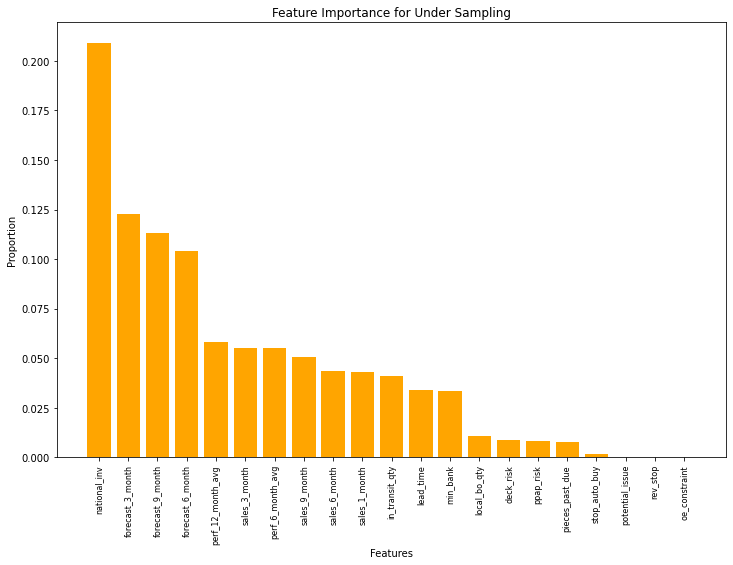

In [58]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_under.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(X_under.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(X_under.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for Under Sampling")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

## Insights 
    

    * Here False negatives are 211, this impacts recall. Making it 93.8 %
    * As per the feature importance plot, Inventory plays a vital role. 
    * More than 20% importance was given to national inventory by the algorithm.
    * This indicates that national inventory has a huge impact on predicting if the prodcut goes to backorder or not.
    * Subsequently, there are other features to which the algorithm has given importance.
    * if we consider the right part of the plot, we have production related features which are not that important as per the        algorithm.
       
    

--------------------------------------------------------------------------------------------------------------------------------

# 2. Over Sampling

The process of increasing the class instances of the MINORITY class is called Oversampling. 

#### Disadvantage
     * It will cause OVERFITTING as we are increasing the samples of the minority class..

### 1 - Backorder (Minority Class)

### 0  - Not Backorder (Majority Class)

In [59]:
BO_sample = df[df['went_on_backorder']==1].sample(number_not_bo, replace=True)

In [60]:
#create a new dataframe containing only non-fraud data
df_not_BO = df[df['went_on_backorder']==0]

In [61]:
over_sample_df = pd.concat([BO_sample,df_not_BO], axis=0)

In [62]:
over_sample_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
7274,10379,2,3,0,7,11,18,1,7,15,19,0,0,0,0.99,0.98,0,0,0,1,1,0,1
9884,14155,0,9,0,32,32,32,0,0,0,55,0,0,0,0.85,0.82,0,0,0,0,1,0,1
23913,34073,-1,8,0,11,11,11,0,0,0,0,2,0,0,0.78,0.83,1,1,0,0,1,0,1
56404,80591,12,8,0,92,137,182,17,61,109,166,18,0,0,0.48,0.57,0,0,0,1,1,0,1
44659,63729,5,8,0,0,3,4,3,5,11,14,0,0,0,0.99,0.99,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58911,84162,79,2,0,0,0,0,6,11,16,23,0,0,0,1.00,0.95,0,0,0,0,1,0,0
58912,84163,2,2,0,0,0,0,0,0,0,0,0,0,0,0.42,0.36,0,1,0,1,1,0,0
58914,84165,11,8,0,0,0,0,2,6,17,26,6,0,0,0.54,0.64,0,1,0,0,1,0,0
58917,84169,6,4,0,0,0,0,0,0,0,0,0,0,0,0.77,0.80,0,1,0,0,1,0,0


In [63]:
over_sample_wen_on_BO_counts=pd.value_counts(over_sample_df['went_on_backorder'])

In [64]:
Counter(over_sample_df["went_on_backorder"])

Counter({1: 49624, 0: 49624})

<AxesSubplot:>

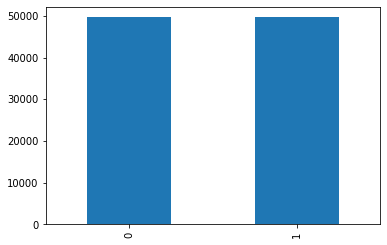

In [65]:
over_sample_wen_on_BO_counts.plot(kind='bar')

##### Now that our data is balanced , we can split the data to X , y, Train and test

In [66]:
X_over = over_sample_df.drop(["sku" , "went_on_backorder"] , 1)
y_over = over_sample_df["went_on_backorder"]

In [67]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.30, random_state=100)

### Random Forest 

In [68]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [69]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_over_train, y_over_train)

RandomForestClassifier()

#### Random Forest Prediction

In [70]:
# Predicted probabilities
y_pred = rf.predict_proba(x_over_test)

In [71]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [72]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [73]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_over_test)

In [74]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [75]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [76]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [77]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [78]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [79]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [80]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,39526,1,1.00
1,8835,1,1.00
2,25066,1,1.00
3,9898,1,1.00
4,31682,0,0.13


In [81]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [82]:
y_pred_final

,sku,went_on_backorder,went_backorder_Prob,predicted
0,39526,1,1.0000,1
1,8835,1,1.0000,1
2,25066,1,1.0000,1
3,9898,1,1.0000,1
4,31682,0,0.1300,0
...,...,...,...,...
29770,3494,1,0.9800,1
29771,9906,1,1.0000,1
29772,41809,0,0.0175,0
29773,12151,0,0.0000,0


In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[14016,   826],
       [   87, 14846]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

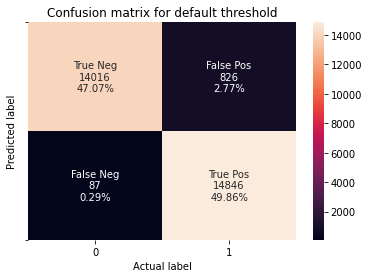

In [84]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [85]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     14842
           1       0.95      0.99      0.97     14933

    accuracy                           0.97     29775
   macro avg       0.97      0.97      0.97     29775
weighted avg       0.97      0.97      0.97     29775



In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

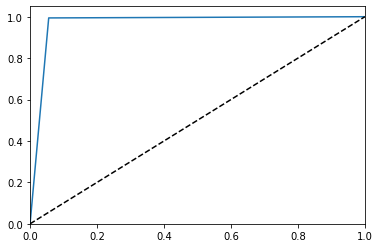

(array([0.        , 0.05565288, 1.        ]),
 array([0.        , 0.99417398, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [87]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [88]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 96.92605500634723
The Recall score is :  99.4173977097703
The Precision score is :  94.72945380296069
The f1 score is :  97.01682731579807


#### The Oversampling method is highly overfitting

In [89]:
print(confusion)

[[14016   826]
 [   87 14846]]


Text(33.0, 0.5, 'Predicted label')

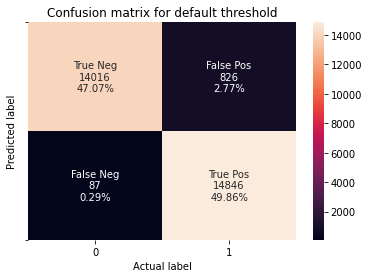

In [90]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

### COMPARISON

#### ROC_AUC

In [91]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_over_train)

print("The Training roc_auc score for Over Sampling is :", roc_auc_score(y_over_train,pred_train)*100)
print("The Testing roc_auc score for Over Sampling is :", roc_auc_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training roc_auc score for Over Sampling is : 99.73681222891176
The Testing roc_auc score for Over Sampling is : 96.92605500634723


#### PRECISION

In [92]:
print("The Training Precision score for Over Sampling is :", precision_score(y_over_train,pred_train)*100)
print("The Testing Precision score for Over Sampling is :", precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Precision score for Over Sampling is : 99.56621660442401
The Testing Precision score for Over Sampling is : 94.72945380296069


#### RECALL

In [93]:
print("The Training Recall score for Over Sampling is :", recall_score(y_over_train,pred_train)*100)
print("The Testing Recall score for Over Sampling is :", recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training Recall score for Over Sampling is : 99.90775705514399
The Testing Recall score for Over Sampling is : 99.4173977097703


### F1 

In [94]:
print("The Training F1 score for Over Sampling is :", f1_score(y_over_train,pred_train)*100)
print("The Testing F1 score for Over Sampling is :", f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted)*100)

The Training F1 score for Over Sampling is : 99.73669443605128
The Testing F1 score for Over Sampling is : 97.01682731579807


     ----It is clear that oversampling the data, is indeed making it overfitting . The data is multiplicated----

## Feature Importance

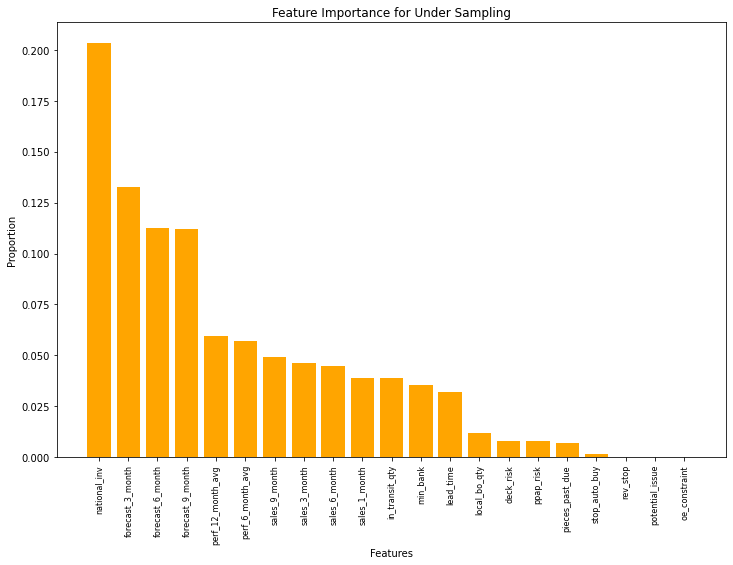

In [95]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_over.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(X_over.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(X_over.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for Under Sampling")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

### Insights:

    * This feature importance plot is similar to the Under Sampling feature importance plot.
    

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

## 3. SMOTE - Synthetic Minority Over Sampling Technique

The right way to work on imbalanced data and SMOTE is to oversample only on the training data, and leave the test data unseen
 
     * Split the training data further into train and validation data
    
              -- original test data = x_test, y_test
    
              -- original train_data = x_train, y_train
    
     * I will further split x_train, y_train to x_val, y_val, x_train_new, y_train_new
    
     * I will build the models on x_val and y_val, and check the model for performance on x_train_new, y_train_new
    
     * Finally I will check the performace of the model on the unseen x_test, y_test

In [96]:
import imblearn
from imblearn.over_sampling import SMOTE

In [97]:
x_val, x_train_new, y_val,y_train_new = train_test_split(x_train, y_train, test_size = 0.30, random_state=12)

In [98]:
sm = SMOTE()

In [101]:
x_train_res, y_train_res = sm.fit_resample(x_val, y_val)

----- Here SMOTE.fit_sample gives me the resampled data i.e the oversampled data -----

In [102]:
Counter(y_train_res)

Counter({0: 24425, 1: 24425})

### Random Forest 

In [103]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

In [104]:
# Let's run the model

rf = RandomForestClassifier()
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

#### Random Forest prediction

In [105]:
# Predicted probabilities
y_pred = rf.predict_proba(x_test)

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [107]:
# Converting to column dataframe (keeping the outcome of 1)
y_pred_1 = y_pred_df.iloc[:,[1]]

In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting sku to index
y_test_df['sku'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [112]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'went_backorder_Prob'})

In [113]:
cols = y_pred_final.columns.tolist()
cols

['went_on_backorder', 'sku', 'went_backorder_Prob']

In [114]:
cols.insert(1, cols.pop(cols.index('went_on_backorder')))  ## 0 is the destination index , Mid is ur feature
cols

['sku', 'went_on_backorder', 'went_backorder_Prob']

In [115]:
y_pred_final = y_pred_final.reindex(columns= cols)
y_pred_final.head()
## Column reindex is performed 

,sku,went_on_backorder,went_backorder_Prob
0,57099,0,0.680
1,47622,0,0.005
2,47550,0,0.000
3,54108,0,0.020
4,44439,0,0.000


In [116]:
# Creating new column 'predicted' with 1 if went_on_backorder >0.5 else 0
y_pred_final['predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [117]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted
0,57099,0,0.680,1
1,47622,0,0.005,0
2,47550,0,0.000,0
3,54108,0,0.020,0
4,44439,0,0.000,0


### Random Forest Metrics 

In [118]:
from sklearn import metrics 

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.went_on_backorder, y_pred_final.predicted )
confusion

array([[13865,   966],
       [  581,  2264]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

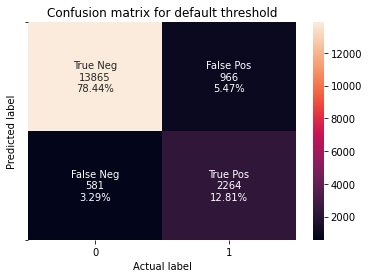

In [120]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')



In [121]:
Classification = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.predicted)
print(Classification)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     14831
           1       0.70      0.80      0.75      2845

    accuracy                           0.91     17676
   macro avg       0.83      0.87      0.85     17676
weighted avg       0.92      0.91      0.91     17676



### ROC plot

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('FPR')
    #plt.ylabel('TPR')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [123]:
def roc_auc(actual , probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    return auc_score

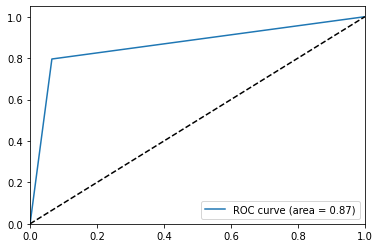

(array([0.        , 0.06513384, 1.        ]),
 array([0.        , 0.79578207, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [124]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.predicted)

In [125]:
roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted)

0.8653241162676525

In [126]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 86.53241162676525
The Recall score is :  79.57820738137083
The Precision score is :  70.09287925696594
The f1 score is :  74.53497942386832


### Comparison

#### ROC_AUC

In [127]:
#Training score
from sklearn.metrics import roc_auc_score
pred_train=rf.predict(x_train)
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training roc_auc score SMOTING is : 95.3805142574121
The testing roc_auc score for SMOTING is :  86.53241162676525


#### PRECISION

In [128]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Precision score SMOTING is : 89.65827338129496
The testing Precision score for SMOTING is :  70.09287925696594


#### RECALL

In [129]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Recall score SMOTING is : 92.74418604651163
The testing Recall score for SMOTING is :  79.57820738137083


#### F1

In [130]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training F1 score SMOTING is : 91.17512574302697
The testing F1 score for SMOTING is :  74.53497942386832


## Feature Importance

In [131]:
x_train = pd.DataFrame(x_train)

In [132]:
x_train = x_train.rename(columns={0:"national_inv",1:"lead_time",2:"in_transit_qty",3:"forecast_3_month",4:"forecast_6_month",
                                  5:"forecast_9_month",6:"sales_1_month",7:"sales_3_month",8:"sales_6_month",9:"sales_9_month",
                                 10:"min_bank",11:"potential_issue",12:"pieces_past_due",13:"perf_6_month_avg",14:"perf_12_month_avg",
                                 15:"local_bo_qty",16:"deck_risk",17:"oe_constraint",18:"ppap_risk",19:"stop_auto_buy",20:"rev_stop"})

In [133]:
x_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.005301,0.428571,0.0,0.000000,0.000068,0.000070,0.000203,0.000074,0.000114,0.000117,0.000000,0.0,0.0,0.77,0.68,0.0,0.0,0.0,0.0,1.0,0.0
1,0.005419,0.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.57,0.68,0.0,0.0,0.0,0.0,1.0,0.0
2,0.008778,0.321429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000076,0.000117,0.000000,0.0,0.0,0.86,0.84,0.0,0.0,0.0,0.0,1.0,0.0
3,0.005301,0.071429,0.0,0.000128,0.000068,0.000047,0.000203,0.000074,0.000038,0.000023,0.000000,0.0,0.0,0.99,0.96,0.0,1.0,0.0,0.0,1.0,0.0
4,0.056210,0.071429,0.0,0.000000,0.000000,0.000000,0.001824,0.003025,0.002852,0.002813,0.007670,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41238,0.005262,0.178571,0.0,0.000192,0.000103,0.000070,0.000000,0.000221,0.000114,0.000070,0.000590,0.0,0.0,0.73,0.70,0.0,0.0,0.0,1.0,1.0,0.0
41239,0.005550,0.285714,0.0,0.002179,0.002329,0.001581,0.001824,0.002287,0.001787,0.002086,0.007080,0.0,0.0,0.70,0.70,0.0,0.0,0.0,0.0,1.0,0.0
41240,0.005262,0.428571,0.0,0.000513,0.000377,0.000326,0.000000,0.000148,0.000190,0.000234,0.000000,0.0,0.0,0.78,0.78,0.0,0.0,0.0,0.0,1.0,0.0
41241,0.005445,0.285714,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000038,0.000047,0.000295,0.0,0.0,0.98,0.96,0.0,1.0,0.0,0.0,1.0,0.0


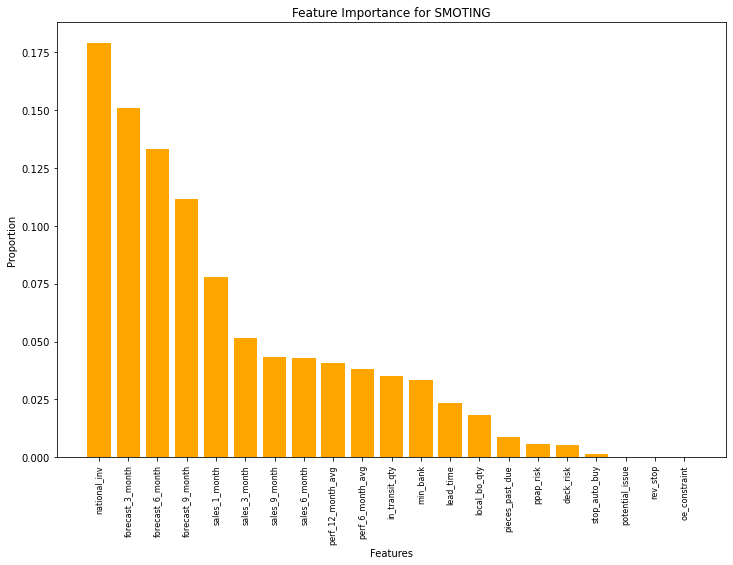

In [134]:
# Calculate feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(12,8))
plt.bar(range(x_train.shape[1]), importances[indices] , color = "orange")
# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90, fontsize = 8)

# Create plot title
plt.title("Feature Importance for SMOTING")
# Show plot
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.show()

### Insights: 

    * Unlike, Under sampling or Over Sampling, here forecast_3months,perf_6months and perf_12months are close to                    national_inventory.
    * Thus Smoting technique, gave importance to top 4 features.
    

### Lets see if we can optimise the threshold 

#### Youdens-cuttoff

In [135]:
#Threshold Moving
#func for best threshold
def best_threshold(tpr,fpr):
    J = tpr - fpr
    ix = np.argmax(J) 
    best_thresh = thresholds[ix]
    return(f'Best Threshold',np.round(best_thresh,6))

In [136]:
# calculate roc curves with probability
fpr, tpr, thresholds = roc_curve(y_pred_final.went_on_backorder, y_pred_final.went_backorder_Prob)

In [137]:
best_threshold(tpr,fpr)

('Best Threshold', 0.28)

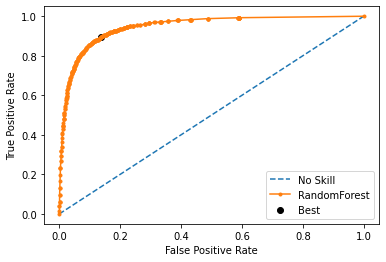

In [138]:
# plot the roc curve for the model
ix = np.argmax(tpr-fpr)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Youdens Cutoff - 0.177

In [139]:
y_pred_final['final_predicted'] = y_pred_final.went_backorder_Prob.map( lambda x: 1 if x >= best_threshold(tpr,fpr)[1] else 0)

In [140]:
y_pred_final.head()

,sku,went_on_backorder,went_backorder_Prob,predicted,final_predicted
0,57099,0,0.680,1,1
1,47622,0,0.005,0,0
2,47550,0,0.000,0,0
3,54108,0,0.020,0,0
4,44439,0,0.000,0,0


In [141]:
Confusion_after_opt_thres = metrics.confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Confusion_after_opt_thres)
## the FP has increased tremendously, but the FN have decreases subsequently.

[[12803  2028]
 [  295  2550]]


Text(33.0, 0.5, 'Predicted label')

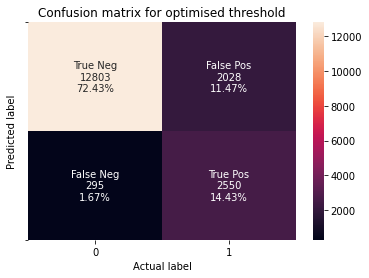

In [142]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


In [143]:
Classification_after_opt_thres = metrics.classification_report(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
print(Classification_after_opt_thres)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.56      0.90      0.69      2845

    accuracy                           0.87     17676
   macro avg       0.77      0.88      0.80     17676
weighted avg       0.91      0.87      0.88     17676



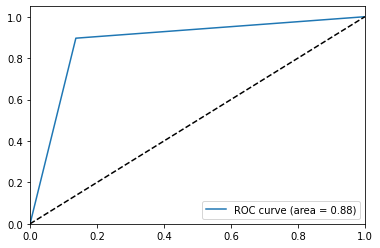

(array([0.        , 0.13674061, 1.        ]),
 array([0.        , 0.89630931, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [144]:
draw_roc(y_pred_final.went_on_backorder, y_pred_final.final_predicted)

In [145]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 87.97843518521918
The Recall score is :  89.63093145869946
The Precision score is :  55.70117955439057
The f1 score is :  68.70537518523508


In [146]:
print(Confusion_after_opt_thres)

[[12803  2028]
 [  295  2550]]


Text(33.0, 0.5, 'Predicted label')

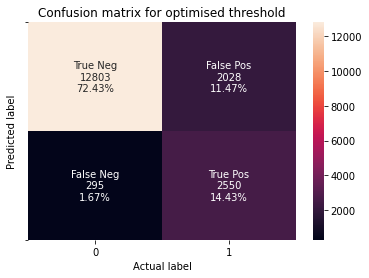

In [147]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


### Comparison for SMOTING

### BEFORE OPTIMISING THRESHOLD

#### ROC_AUC

In [148]:
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training roc_auc score SMOTING is : 95.3805142574121
The testing roc_auc score for SMOTING is :  86.53241162676525


#### PRECISION

In [149]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Precision score SMOTING is : 89.65827338129496
The testing Precision score for SMOTING is :  70.09287925696594


#### RECALL

In [150]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training Recall score SMOTING is : 92.74418604651163
The testing Recall score for SMOTING is :  79.57820738137083


#### F1 

In [151]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The training F1 score SMOTING is : 91.17512574302697
The testing F1 score for SMOTING is :  74.53497942386832


#### OVERALL

In [152]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.predicted) * 100)

The AUC score is : 86.53241162676525
The Recall score is :  79.57820738137083
The Precision score is :  70.09287925696594
The f1 score is :  74.53497942386832


In [153]:
print(confusion)

[[13865   966]
 [  581  2264]]


Text(33.0, 0.5, 'Predicted label')

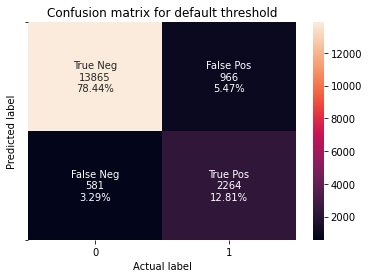

In [154]:
#confusion matrix for default threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for default threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


### AFTER OPTIMISING THRESHOLD

#### ROC_AUC

In [155]:
print("The training roc_auc score SMOTING is :", roc_auc_score(y_train,pred_train)*100)
print("The testing roc_auc score for SMOTING is : ", roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training roc_auc score SMOTING is : 95.3805142574121
The testing roc_auc score for SMOTING is :  87.97843518521918


#### PRECISION

In [156]:
print("The training Precision score SMOTING is :", metrics.precision_score(y_train,pred_train)*100)
print("The testing Precision score for SMOTING is : ", metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training Precision score SMOTING is : 89.65827338129496
The testing Precision score for SMOTING is :  55.70117955439057


#### RECALL

In [157]:
print("The training Recall score SMOTING is :", metrics.recall_score(y_train,pred_train)*100)
print("The testing Recall score for SMOTING is : ", metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training Recall score SMOTING is : 92.74418604651163
The testing Recall score for SMOTING is :  89.63093145869946


#### F1

In [158]:
print("The training F1 score SMOTING is :", metrics.f1_score(y_train,pred_train)*100)
print("The testing F1 score for SMOTING is : ", metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The training F1 score SMOTING is : 91.17512574302697
The testing F1 score for SMOTING is :  68.70537518523508


#### OVERALL

In [159]:
print("The AUC score is :" , roc_auc(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Recall score is : " , metrics.recall_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The Precision score is : " , metrics.precision_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)
print("The f1 score is : " , metrics.f1_score(y_pred_final.went_on_backorder, y_pred_final.final_predicted) * 100)

The AUC score is : 87.97843518521918
The Recall score is :  89.63093145869946
The Precision score is :  55.70117955439057
The f1 score is :  68.70537518523508


In [160]:
print(Confusion_after_opt_thres)

[[12803  2028]
 [  295  2550]]


Text(33.0, 0.5, 'Predicted label')

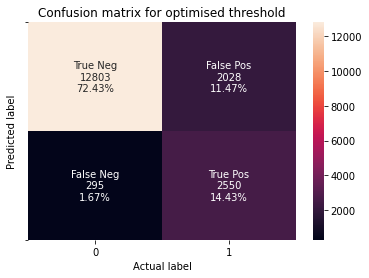

In [161]:
#confusion matrix for optimised threshold

cf_matrix = confusion_matrix(y_pred_final.went_on_backorder, y_pred_final.final_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="")
#plt.xticks([2,0])
plt.yticks([0,2])
plt.title('Confusion matrix for optimised threshold')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')


## Insights 

    * We have to check the recall performance metric, as it could reduce our False Negative(Type II error) 
    * Since we are getting 83% of recall, It is a good model as we select less False Negative with high cost 

### Let's create a Data Frame 

In [162]:
# initialize the data

data = {"Under Sampling" : [99.66,91.41,99.82,89.62,99.50,93.80,99.66,91.66] ,
        "Over Sampling" : [99.61,99.58,99.63,99.56,99.58,99.60,99.61,99.58],
       "Smoting Before Threshold":[92.06,75.69,20.76,12.40,86.36,53.93,33.48,20.17],
       "Smoting After Threshold":[92.06,84.36,20.76,3.67,86.36,83.35,33.48,7.07]}

In [163]:
index = ["Training ROC_AUC","Testing ROC_AUC","Training PRECISION","Testing PRECISION","Training RECALL","Testing RECALL","Training F1","Testing F1"]

In [164]:
final_df = pd.DataFrame(data,index=index)

In [165]:
final_df

,Under Sampling,Over Sampling,Smoting Before Threshold,Smoting After Threshold
Training ROC_AUC,99.66,99.61,92.06,92.06
Testing ROC_AUC,91.41,99.58,75.69,84.36
Training PRECISION,99.82,99.63,20.76,20.76
Testing PRECISION,89.62,99.56,12.40,3.67
Training RECALL,99.50,99.58,86.36,86.36
Testing RECALL,93.80,99.60,53.93,83.35
Training F1,99.66,99.61,33.48,33.48
Testing F1,91.66,99.58,20.17,7.07


## Overall Insights of Re-sampling Techniques 

    * The problem statement is to predict if the product has gone to backorder or not.
    
    * While considering this objective, there are various performance metrics which can be pritoritized. 
    
    * Hence, we will be focussing on the Recall metrics for this dataset. 
    
    * Recall concentrates more on the False Negatives.
    
    * Here, False Negatives are "Incorrectly Classified Non Back Order"
    
    * Lower the FN, Better the model predictions.
    
    * Undersampling (FN = 211) , Oversampling (FN = 1977) , SMOTE (FN = 560)[After Threshold optimisation]
    
    * It is clearly understood that, if we undersample the data, we will be obtaining the least FN.
    
    * However, Undersampling leads to huge loss of data. 
    
    * The observations in this data is highly critical, we should not tolerate loss of data. 
    
    * In-order to recover from this, we can optimise the threshold in our Machine Learning Algorithm. 
    